In [82]:

import pandas as pd


data = pd.read_csv('C:/Users/nicom/CSD/matriz.csv', encoding='utf-8',delimiter=';')
data
df = data.T
df.columns = df.iloc[0]
df = df[1:]
df

Error,BPO_Extrae_total_de_haberes,BPO_No_se_extrae_glosas,BPO-Error_aplicación_de_plantilla,BPO-Error_de_extracción,BPO-Error_de_extracción_AFP,BPO-Error_de_extracción_días_LS,BPO-Extracción_glosas_no_imponibles,BPO-Extracción_imprecisa,Impl.BPO-Calculo_automatizado_días_trabajado,Impl.BPO-Extracción_segunda_página,LAB_Error_de_clasificación_replicado,LAB_Excepción_por_cargo,LAB_Falla_de_regla_Gratificaciones,LAB-Cambio_de_formato,LAB-Distancia_de_Levenshtein,LAB-Error_de_clasificación,LAB-Error_de_clasificación_indentificado,LAB-Excepción_por_empresa,Total_error,Total_de_los_Folios
23-oct,0,0,2,1,2,2,10,6,2,3,0,0,0,0,1,10,4,1,50,387
24-oct,1,2,2,0,4,0,3,4,0,1,2,0,0,0,0,0,0,0,20,235
25-oct,0,1,2,2,6,3,4,3,2,2,2,1,0,2,0,3,6,0,47,330
26-oct,0,2,1,0,2,2,3,2,2,2,0,1,0,0,0,2,1,0,26,244
30-oct,0,0,1,0,2,0,4,1,1,0,2,0,1,0,0,1,1,0,16,98
31-oct,0,0,0,1,0,0,2,0,0,0,1,1,0,1,0,3,2,0,13,156
02-nov,0,0,0,0,1,0,3,0,0,0,1,0,0,0,0,0,2,0,9,76


In [87]:
import numpy as np

df2= pd.DataFrame()

df2['fecha'] = df.index

for columna in df.columns[0:-1]:  # Excluye la última columna 'Total_de_los_Folios'
    mask = (df[columna] != 0)
    df2[columna] = np.where(mask, (df[columna] / df['Total_de_los_Folios']) , 0)
df2


,fecha,BPO_Extrae_total_de_haberes,BPO_No_se_extrae_glosas,BPO-Error_aplicación_de_plantilla,BPO-Error_de_extracción,BPO-Error_de_extracción_AFP,BPO-Error_de_extracción_días_LS,BPO-Extracción_glosas_no_imponibles,BPO-Extracción_imprecisa,Impl.BPO-Calculo_automatizado_días_trabajado,Impl.BPO-Extracción_segunda_página,LAB_Error_de_clasificación_replicado,LAB_Excepción_por_cargo,LAB_Falla_de_regla_Gratificaciones,LAB-Cambio_de_formato,LAB-Distancia_de_Levenshtein,LAB-Error_de_clasificación,LAB-Error_de_clasificación_indentificado,LAB-Excepción_por_empresa,Total_error
0,23-oct,0,0,0.005168,0.002584,0.005168,0.005168,0.02584,0.015504,0.005168,0.007752,0,0,0,0,0.002584,0.02584,0.010336,0.002584,0.129199
1,24-oct,0.004255,0.008511,0.008511,0,0.017021,0,0.012766,0.017021,0,0.004255,0.008511,0,0,0,0,0,0,0,0.085106
2,25-oct,0,0.00303,0.006061,0.006061,0.018182,0.009091,0.012121,0.009091,0.006061,0.006061,0.006061,0.00303,0,0.006061,0,0.009091,0.018182,0,0.142424
3,26-oct,0,0.008197,0.004098,0,0.008197,0.008197,0.012295,0.008197,0.008197,0.008197,0,0.004098,0,0,0,0.008197,0.004098,0,0.106557
4,30-oct,0,0,0.010204,0,0.020408,0,0.040816,0.010204,0.010204,0,0.020408,0,0.010204,0,0,0.010204,0.010204,0,0.163265
5,31-oct,0,0,0,0.00641,0,0,0.012821,0,0,0,0.00641,0.00641,0,0.00641,0,0.019231,0.012821,0,0.083333
6,02-nov,0,0,0,0,0.013158,0,0.039474,0,0,0,0.013158,0,0,0,0,0,0.026316,0,0.118421


In [88]:
df2t = df2.T
df2t.columns = df2t.iloc[0]
df2t = df2t[1:]
suma_columnas = df2t.iloc[:, 1:].sum(axis=1)
promedio = suma_columnas / (df2t.shape[1])
df2t['Promedio_error'] = promedio
df2t.to_excel('C:/Users/nicom/CSD/errorXfecha.xlsx', index=True, engine='openpyxl')
df2t

fecha,23-oct,24-oct,25-oct,26-oct,30-oct,31-oct,02-nov,Promedio_error
BPO_Extrae_total_de_haberes,0,0.004255,0,0,0,0,0,0.000608
BPO_No_se_extrae_glosas,0,0.008511,0.00303,0.008197,0,0,0,0.002820
BPO-Error_aplicación_de_plantilla,0.005168,0.008511,0.006061,0.004098,0.010204,0,0,0.004125
BPO-Error_de_extracción,0.002584,0,0.006061,0,0,0.00641,0,0.001782
BPO-Error_de_extracción_AFP,0.005168,0.017021,0.018182,0.008197,0.020408,0,0.013158,0.010995
BPO-Error_de_extracción_días_LS,0.005168,0,0.009091,0.008197,0,0,0,0.002470
BPO-Extracción_glosas_no_imponibles,0.02584,0.012766,0.012121,0.012295,0.040816,0.012821,0.039474,0.018613
BPO-Extracción_imprecisa,0.015504,0.017021,0.009091,0.008197,0.010204,0,0,0.006359
Impl.BPO-Calculo_automatizado_días_trabajado,0.005168,0,0.006061,0.008197,0.010204,0,0,0.003494
Impl.BPO-Extracción_segunda_página,0.007752,0.004255,0.006061,0.008197,0,0,0,0.002645


6

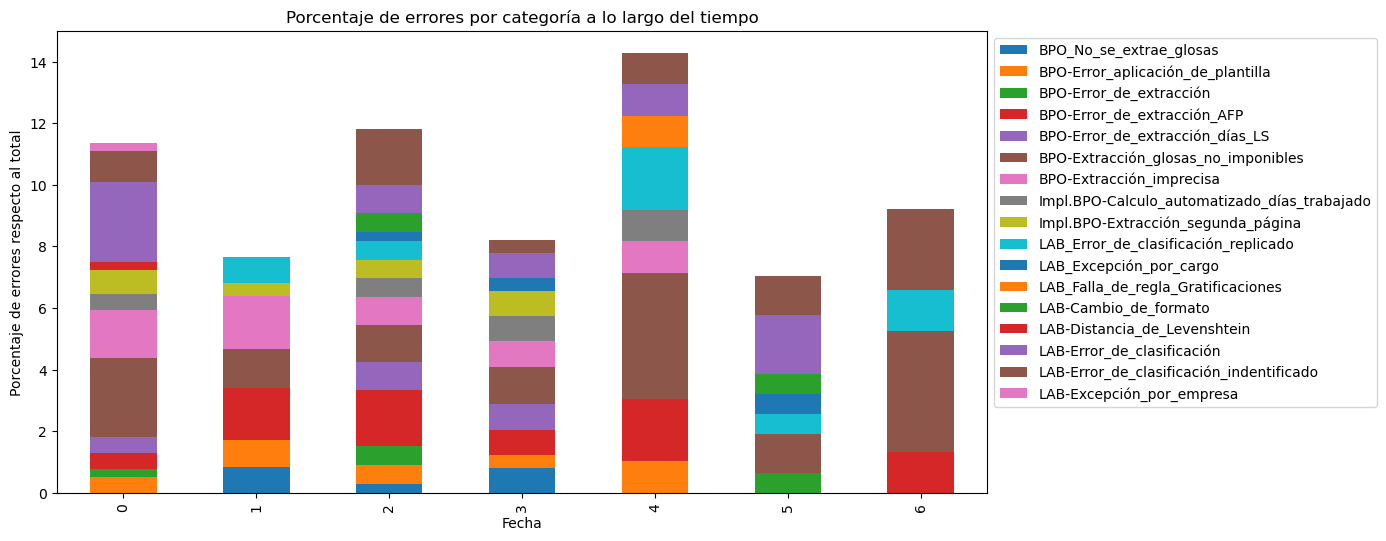

In [56]:

import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame 'df' con los datos

# Excluye la columna 'fecha' y 'Total_error' para la visualización
df2_plot = df2.drop(['fecha', 'Total_error'], axis=1)

# Crea el gráfico de barras apiladas
ax = df2_plot.plot(kind='bar', stacked=True, figsize=(12, 6))

# Añade etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de errores respecto al total')
plt.title('Porcentaje de errores por categoría a lo largo del tiempo')

# Muestra la leyenda fuera del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()
